In [2]:
import pandas as pd

In [3]:
df=pd.read_csv('./data/wine.csv', header=None)

In [4]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


12열
- 1: 레드와인
- 0: 화이트와인

In [5]:
X=df.iloc[:,0:12]
y=df.iloc[:,12]

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle = True)

In [8]:
model = Sequential()
model.add(Dense(30, input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                390       
                                                                 
 dense_1 (Dense)             (None, 12)                372       
                                                                 
 dense_2 (Dense)             (None, 8)                 104       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 875
Trainable params: 875
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [10]:
history = model.fit(X_train, y_train, epochs=50, batch_size=500, validation_split=0.25) #0.8*0.25=0.2

Epoch 1/50
8/8 [==============================] - 2s 48ms/step - loss: 3.9630 - accuracy: 0.2438 - val_loss: 0.7842 - val_accuracy: 0.3615
Epoch 2/50
8/8 [==============================] - 0s 14ms/step - loss: 0.4105 - accuracy: 0.8034 - val_loss: 0.3476 - val_accuracy: 0.8515
Epoch 3/50
8/8 [==============================] - 0s 20ms/step - loss: 0.3236 - accuracy: 0.8632 - val_loss: 0.2945 - val_accuracy: 0.8777
Epoch 4/50
8/8 [==============================] - 0s 11ms/step - loss: 0.2738 - accuracy: 0.8966 - val_loss: 0.2808 - val_accuracy: 0.8962
Epoch 5/50
8/8 [==============================] - 0s 12ms/step - loss: 0.2646 - accuracy: 0.9086 - val_loss: 0.2602 - val_accuracy: 0.9015
Epoch 6/50
8/8 [==============================] - 0s 10ms/step - loss: 0.2509 - accuracy: 0.9066 - val_loss: 0.2514 - val_accuracy: 0.9062
Epoch 7/50
8/8 [==============================] - 0s 15ms/step - loss: 0.2402 - accuracy: 0.9145 - val_loss: 0.2425 - val_accuracy: 0.9169
Epoch 8/50
8/8 [===========

In [14]:
score = model.evaluate(X_test, y_test)
print('Test accuracy:', score[1])

41/41 [==============================] - 0s 2ms/step - loss: 0.1911 - accuracy: 0.9308
Test accuracy: 0.9307692050933838


## 모델 업데이트하기

In [15]:
modelpath = "./data/model/all/{epoch:02d}-{val_accuracy:4f}.hdf5"

In [16]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [17]:
checkpointer=ModelCheckpoint(filepath=modelpath, verbose=1)

In [18]:
history = model.fit(X_train, y_train, epochs=50, batch_size=500, validation_split=0.25, verbose=0, callbacks=[checkpointer])


Epoch 1: saving model to ./data/model/all\01-0.940769.hdf5

Epoch 2: saving model to ./data/model/all\02-0.941538.hdf5

Epoch 3: saving model to ./data/model/all\03-0.940000.hdf5

Epoch 4: saving model to ./data/model/all\04-0.941538.hdf5

Epoch 5: saving model to ./data/model/all\05-0.942308.hdf5

Epoch 6: saving model to ./data/model/all\06-0.942308.hdf5

Epoch 7: saving model to ./data/model/all\07-0.943077.hdf5

Epoch 8: saving model to ./data/model/all\08-0.943846.hdf5

Epoch 9: saving model to ./data/model/all\09-0.944615.hdf5

Epoch 10: saving model to ./data/model/all\10-0.943077.hdf5

Epoch 11: saving model to ./data/model/all\11-0.943077.hdf5

Epoch 12: saving model to ./data/model/all\12-0.943846.hdf5

Epoch 13: saving model to ./data/model/all\13-0.943077.hdf5

Epoch 14: saving model to ./data/model/all\14-0.944615.hdf5

Epoch 15: saving model to ./data/model/all\15-0.943846.hdf5

Epoch 16: saving model to ./data/model/all\16-0.943846.hdf5

Epoch 17: saving model to ./data

In [19]:
score=model.evaluate(X_test, y_test)
print('Test accuracy:', score[1])

41/41 [==============================] - 0s 2ms/step - loss: 0.1289 - accuracy: 0.9469
Test accuracy: 0.9469230771064758


## 그래프로 과적합 확인하기

In [20]:
history = model.fit(X_train, y_train, epochs=2000, batch_size=500, validation_split=0.25)

Epoch 1/2000
8/8 [==============================] - 0s 20ms/step - loss: 0.1143 - accuracy: 0.9577 - val_loss: 0.1226 - val_accuracy: 0.9585
Epoch 2/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.1131 - accuracy: 0.9597 - val_loss: 0.1217 - val_accuracy: 0.9577
Epoch 3/2000
8/8 [==============================] - 0s 15ms/step - loss: 0.1119 - accuracy: 0.9605 - val_loss: 0.1219 - val_accuracy: 0.9523
Epoch 4/2000
8/8 [==============================] - 0s 11ms/step - loss: 0.1122 - accuracy: 0.9595 - val_loss: 0.1227 - val_accuracy: 0.9600
Epoch 5/2000
8/8 [==============================] - 0s 10ms/step - loss: 0.1106 - accuracy: 0.9584 - val_loss: 0.1201 - val_accuracy: 0.9585
Epoch 6/2000
8/8 [==============================] - 0s 14ms/step - loss: 0.1097 - accuracy: 0.9610 - val_loss: 0.1192 - val_accuracy: 0.9538
Epoch 7/2000
8/8 [==============================] - 0s 14ms/step - loss: 0.1127 - accuracy: 0.9625 - val_loss: 0.1177 - val_accuracy: 0.9577
Epoch 8/2000


Epoch 59/2000
8/8 [==============================] - 0s 13ms/step - loss: 0.0821 - accuracy: 0.9754 - val_loss: 0.0944 - val_accuracy: 0.9723
Epoch 60/2000
8/8 [==============================] - 0s 8ms/step - loss: 0.0824 - accuracy: 0.9751 - val_loss: 0.0972 - val_accuracy: 0.9723
Epoch 61/2000
8/8 [==============================] - 0s 8ms/step - loss: 0.0814 - accuracy: 0.9749 - val_loss: 0.0939 - val_accuracy: 0.9715
Epoch 62/2000
8/8 [==============================] - 0s 15ms/step - loss: 0.0812 - accuracy: 0.9751 - val_loss: 0.0945 - val_accuracy: 0.9715
Epoch 63/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.0826 - accuracy: 0.9743 - val_loss: 0.0944 - val_accuracy: 0.9715
Epoch 64/2000
8/8 [==============================] - 0s 8ms/step - loss: 0.0808 - accuracy: 0.9759 - val_loss: 0.0926 - val_accuracy: 0.9723
Epoch 65/2000
8/8 [==============================] - 0s 13ms/step - loss: 0.0800 - accuracy: 0.9766 - val_loss: 0.0924 - val_accuracy: 0.9746
Epoch 66/2

Epoch 117/2000
8/8 [==============================] - 0s 8ms/step - loss: 0.0641 - accuracy: 0.9800 - val_loss: 0.0822 - val_accuracy: 0.9777
Epoch 118/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.0658 - accuracy: 0.9784 - val_loss: 0.0789 - val_accuracy: 0.9769
Epoch 119/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.0636 - accuracy: 0.9808 - val_loss: 0.0795 - val_accuracy: 0.9754
Epoch 120/2000
8/8 [==============================] - 0s 10ms/step - loss: 0.0640 - accuracy: 0.9787 - val_loss: 0.0797 - val_accuracy: 0.9746
Epoch 121/2000
8/8 [==============================] - 0s 19ms/step - loss: 0.0650 - accuracy: 0.9795 - val_loss: 0.0783 - val_accuracy: 0.9785
Epoch 122/2000
8/8 [==============================] - 0s 11ms/step - loss: 0.0634 - accuracy: 0.9800 - val_loss: 0.0804 - val_accuracy: 0.9777
Epoch 123/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.0632 - accuracy: 0.9810 - val_loss: 0.0786 - val_accuracy: 0.9769
Ep

8/8 [==============================] - 0s 9ms/step - loss: 0.0574 - accuracy: 0.9826 - val_loss: 0.0760 - val_accuracy: 0.9754
Epoch 175/2000
8/8 [==============================] - 0s 8ms/step - loss: 0.0599 - accuracy: 0.9787 - val_loss: 0.0767 - val_accuracy: 0.9800
Epoch 176/2000
8/8 [==============================] - 0s 11ms/step - loss: 0.0563 - accuracy: 0.9823 - val_loss: 0.0747 - val_accuracy: 0.9792
Epoch 177/2000
8/8 [==============================] - 0s 8ms/step - loss: 0.0550 - accuracy: 0.9826 - val_loss: 0.0757 - val_accuracy: 0.9800
Epoch 178/2000
8/8 [==============================] - 0s 8ms/step - loss: 0.0549 - accuracy: 0.9838 - val_loss: 0.0749 - val_accuracy: 0.9792
Epoch 179/2000
8/8 [==============================] - 0s 10ms/step - loss: 0.0553 - accuracy: 0.9826 - val_loss: 0.0743 - val_accuracy: 0.9785
Epoch 180/2000
8/8 [==============================] - 0s 10ms/step - loss: 0.0562 - accuracy: 0.9820 - val_loss: 0.0756 - val_accuracy: 0.9746
Epoch 181/2000
8/8

8/8 [==============================] - 0s 10ms/step - loss: 0.0500 - accuracy: 0.9861 - val_loss: 0.0737 - val_accuracy: 0.9800
Epoch 232/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.0498 - accuracy: 0.9849 - val_loss: 0.0738 - val_accuracy: 0.9815
Epoch 233/2000
8/8 [==============================] - 0s 13ms/step - loss: 0.0499 - accuracy: 0.9846 - val_loss: 0.0726 - val_accuracy: 0.9823
Epoch 234/2000
8/8 [==============================] - 0s 11ms/step - loss: 0.0508 - accuracy: 0.9846 - val_loss: 0.0733 - val_accuracy: 0.9777
Epoch 235/2000
8/8 [==============================] - 0s 11ms/step - loss: 0.0510 - accuracy: 0.9846 - val_loss: 0.0750 - val_accuracy: 0.9762
Epoch 236/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.0505 - accuracy: 0.9843 - val_loss: 0.0815 - val_accuracy: 0.9762
Epoch 237/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.0558 - accuracy: 0.9823 - val_loss: 0.0739 - val_accuracy: 0.9777
Epoch 238/2000
8

8/8 [==============================] - 0s 18ms/step - loss: 0.0465 - accuracy: 0.9864 - val_loss: 0.0741 - val_accuracy: 0.9823
Epoch 289/2000
8/8 [==============================] - 0s 13ms/step - loss: 0.0476 - accuracy: 0.9859 - val_loss: 0.0745 - val_accuracy: 0.9792
Epoch 290/2000
8/8 [==============================] - 0s 17ms/step - loss: 0.0460 - accuracy: 0.9872 - val_loss: 0.0752 - val_accuracy: 0.9777
Epoch 291/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.0461 - accuracy: 0.9859 - val_loss: 0.0745 - val_accuracy: 0.9808
Epoch 292/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.0480 - accuracy: 0.9846 - val_loss: 0.0741 - val_accuracy: 0.9823
Epoch 293/2000
8/8 [==============================] - 0s 13ms/step - loss: 0.0478 - accuracy: 0.9854 - val_loss: 0.0753 - val_accuracy: 0.9800
Epoch 294/2000
8/8 [==============================] - 0s 11ms/step - loss: 0.0475 - accuracy: 0.9864 - val_loss: 0.0756 - val_accuracy: 0.9800
Epoch 295/2000
8

8/8 [==============================] - 0s 19ms/step - loss: 0.0452 - accuracy: 0.9874 - val_loss: 0.0747 - val_accuracy: 0.9831
Epoch 346/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.0449 - accuracy: 0.9872 - val_loss: 0.0741 - val_accuracy: 0.9823
Epoch 347/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.0439 - accuracy: 0.9885 - val_loss: 0.0763 - val_accuracy: 0.9792
Epoch 348/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.0438 - accuracy: 0.9872 - val_loss: 0.0828 - val_accuracy: 0.9815
Epoch 349/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.0495 - accuracy: 0.9864 - val_loss: 0.0796 - val_accuracy: 0.9831
Epoch 350/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.0474 - accuracy: 0.9872 - val_loss: 0.0757 - val_accuracy: 0.9785
Epoch 351/2000
8/8 [==============================] - 0s 11ms/step - loss: 0.0460 - accuracy: 0.9864 - val_loss: 0.0758 - val_accuracy: 0.9800
Epoch 352/2000
8

8/8 [==============================] - 0s 9ms/step - loss: 0.0429 - accuracy: 0.9872 - val_loss: 0.0788 - val_accuracy: 0.9838
Epoch 403/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.0434 - accuracy: 0.9882 - val_loss: 0.0777 - val_accuracy: 0.9838
Epoch 404/2000
8/8 [==============================] - 0s 11ms/step - loss: 0.0430 - accuracy: 0.9872 - val_loss: 0.0776 - val_accuracy: 0.9831
Epoch 405/2000
8/8 [==============================] - 0s 14ms/step - loss: 0.0433 - accuracy: 0.9867 - val_loss: 0.0796 - val_accuracy: 0.9831
Epoch 406/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.0426 - accuracy: 0.9874 - val_loss: 0.0771 - val_accuracy: 0.9823
Epoch 407/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.0440 - accuracy: 0.9859 - val_loss: 0.0820 - val_accuracy: 0.9823
Epoch 408/2000
8/8 [==============================] - 0s 11ms/step - loss: 0.0459 - accuracy: 0.9869 - val_loss: 0.0782 - val_accuracy: 0.9838
Epoch 409/2000
8/

8/8 [==============================] - 0s 9ms/step - loss: 0.0437 - accuracy: 0.9872 - val_loss: 0.0782 - val_accuracy: 0.9831
Epoch 460/2000
8/8 [==============================] - 0s 14ms/step - loss: 0.0443 - accuracy: 0.9869 - val_loss: 0.0781 - val_accuracy: 0.9800
Epoch 461/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.0448 - accuracy: 0.9861 - val_loss: 0.0773 - val_accuracy: 0.9808
Epoch 462/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.0421 - accuracy: 0.9879 - val_loss: 0.0781 - val_accuracy: 0.9831
Epoch 463/2000
8/8 [==============================] - 0s 11ms/step - loss: 0.0423 - accuracy: 0.9895 - val_loss: 0.0796 - val_accuracy: 0.9838
Epoch 464/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.0418 - accuracy: 0.9885 - val_loss: 0.0778 - val_accuracy: 0.9800
Epoch 465/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.0423 - accuracy: 0.9872 - val_loss: 0.0844 - val_accuracy: 0.9838
Epoch 466/2000
8/8 

8/8 [==============================] - 0s 9ms/step - loss: 0.0399 - accuracy: 0.9890 - val_loss: 0.0801 - val_accuracy: 0.9800
Epoch 517/2000
8/8 [==============================] - 0s 7ms/step - loss: 0.0401 - accuracy: 0.9882 - val_loss: 0.0802 - val_accuracy: 0.9831
Epoch 518/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.0408 - accuracy: 0.9887 - val_loss: 0.0803 - val_accuracy: 0.9800
Epoch 519/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.0423 - accuracy: 0.9872 - val_loss: 0.0819 - val_accuracy: 0.9792
Epoch 520/2000
8/8 [==============================] - 0s 10ms/step - loss: 0.0416 - accuracy: 0.9887 - val_loss: 0.0806 - val_accuracy: 0.9800
Epoch 521/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.0409 - accuracy: 0.9887 - val_loss: 0.0796 - val_accuracy: 0.9800
Epoch 522/2000
8/8 [==============================] - 0s 14ms/step - loss: 0.0428 - accuracy: 0.9887 - val_loss: 0.0820 - val_accuracy: 0.9792
Epoch 523/2000
8/

8/8 [==============================] - 0s 8ms/step - loss: 0.0397 - accuracy: 0.9885 - val_loss: 0.0824 - val_accuracy: 0.9846
Epoch 574/2000
8/8 [==============================] - 0s 11ms/step - loss: 0.0398 - accuracy: 0.9887 - val_loss: 0.0881 - val_accuracy: 0.9838
Epoch 575/2000
8/8 [==============================] - 0s 8ms/step - loss: 0.0432 - accuracy: 0.9867 - val_loss: 0.0839 - val_accuracy: 0.9838
Epoch 576/2000
8/8 [==============================] - 0s 8ms/step - loss: 0.0396 - accuracy: 0.9877 - val_loss: 0.0816 - val_accuracy: 0.9846
Epoch 577/2000
8/8 [==============================] - 0s 13ms/step - loss: 0.0389 - accuracy: 0.9895 - val_loss: 0.0876 - val_accuracy: 0.9769
Epoch 578/2000
8/8 [==============================] - 0s 10ms/step - loss: 0.0409 - accuracy: 0.9879 - val_loss: 0.0826 - val_accuracy: 0.9800
Epoch 579/2000
8/8 [==============================] - 0s 11ms/step - loss: 0.0433 - accuracy: 0.9864 - val_loss: 0.0812 - val_accuracy: 0.9838
Epoch 580/2000
8/

8/8 [==============================] - 0s 10ms/step - loss: 0.0385 - accuracy: 0.9887 - val_loss: 0.0838 - val_accuracy: 0.9823
Epoch 631/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.0379 - accuracy: 0.9895 - val_loss: 0.0820 - val_accuracy: 0.9808
Epoch 632/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.0385 - accuracy: 0.9885 - val_loss: 0.0819 - val_accuracy: 0.9831
Epoch 633/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.0402 - accuracy: 0.9908 - val_loss: 0.0827 - val_accuracy: 0.9846
Epoch 634/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.0386 - accuracy: 0.9895 - val_loss: 0.0827 - val_accuracy: 0.9838
Epoch 635/2000
8/8 [==============================] - 0s 10ms/step - loss: 0.0391 - accuracy: 0.9900 - val_loss: 0.0837 - val_accuracy: 0.9838
Epoch 636/2000
8/8 [==============================] - 0s 10ms/step - loss: 0.0405 - accuracy: 0.9890 - val_loss: 0.0835 - val_accuracy: 0.9846
Epoch 637/2000
8

8/8 [==============================] - 0s 9ms/step - loss: 0.0568 - accuracy: 0.9846 - val_loss: 0.0825 - val_accuracy: 0.9823
Epoch 688/2000
8/8 [==============================] - 0s 8ms/step - loss: 0.0473 - accuracy: 0.9867 - val_loss: 0.0894 - val_accuracy: 0.9792
Epoch 689/2000
8/8 [==============================] - 0s 8ms/step - loss: 0.0390 - accuracy: 0.9879 - val_loss: 0.0827 - val_accuracy: 0.9823
Epoch 690/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.0373 - accuracy: 0.9892 - val_loss: 0.0825 - val_accuracy: 0.9823
Epoch 691/2000
8/8 [==============================] - 0s 10ms/step - loss: 0.0381 - accuracy: 0.9902 - val_loss: 0.0836 - val_accuracy: 0.9808
Epoch 692/2000
8/8 [==============================] - 0s 13ms/step - loss: 0.0399 - accuracy: 0.9877 - val_loss: 0.0865 - val_accuracy: 0.9815
Epoch 693/2000
8/8 [==============================] - 0s 10ms/step - loss: 0.0408 - accuracy: 0.9887 - val_loss: 0.0891 - val_accuracy: 0.9831
Epoch 694/2000
8/

8/8 [==============================] - 0s 8ms/step - loss: 0.0367 - accuracy: 0.9908 - val_loss: 0.0822 - val_accuracy: 0.9823
Epoch 745/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.0374 - accuracy: 0.9897 - val_loss: 0.0873 - val_accuracy: 0.9777
Epoch 746/2000
8/8 [==============================] - 0s 10ms/step - loss: 0.0416 - accuracy: 0.9877 - val_loss: 0.0835 - val_accuracy: 0.9808
Epoch 747/2000
8/8 [==============================] - 0s 10ms/step - loss: 0.0390 - accuracy: 0.9885 - val_loss: 0.0850 - val_accuracy: 0.9831
Epoch 748/2000
8/8 [==============================] - 0s 15ms/step - loss: 0.0365 - accuracy: 0.9895 - val_loss: 0.0836 - val_accuracy: 0.9815
Epoch 749/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.0364 - accuracy: 0.9908 - val_loss: 0.0861 - val_accuracy: 0.9838
Epoch 750/2000
8/8 [==============================] - 0s 8ms/step - loss: 0.0376 - accuracy: 0.9895 - val_loss: 0.0840 - val_accuracy: 0.9846
Epoch 751/2000
8/

8/8 [==============================] - 0s 9ms/step - loss: 0.0371 - accuracy: 0.9897 - val_loss: 0.0854 - val_accuracy: 0.9823
Epoch 802/2000
8/8 [==============================] - 0s 14ms/step - loss: 0.0378 - accuracy: 0.9892 - val_loss: 0.0851 - val_accuracy: 0.9831
Epoch 803/2000
8/8 [==============================] - 0s 10ms/step - loss: 0.0366 - accuracy: 0.9882 - val_loss: 0.0890 - val_accuracy: 0.9785
Epoch 804/2000
8/8 [==============================] - 0s 8ms/step - loss: 0.0401 - accuracy: 0.9897 - val_loss: 0.0865 - val_accuracy: 0.9815
Epoch 805/2000
8/8 [==============================] - 0s 13ms/step - loss: 0.0369 - accuracy: 0.9892 - val_loss: 0.0903 - val_accuracy: 0.9777
Epoch 806/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.0387 - accuracy: 0.9885 - val_loss: 0.0843 - val_accuracy: 0.9815
Epoch 807/2000
8/8 [==============================] - 0s 10ms/step - loss: 0.0379 - accuracy: 0.9900 - val_loss: 0.0840 - val_accuracy: 0.9815
Epoch 808/2000
8/

8/8 [==============================] - 0s 10ms/step - loss: 0.0356 - accuracy: 0.9905 - val_loss: 0.0874 - val_accuracy: 0.9808
Epoch 859/2000
8/8 [==============================] - 0s 15ms/step - loss: 0.0358 - accuracy: 0.9897 - val_loss: 0.0870 - val_accuracy: 0.9808
Epoch 860/2000
8/8 [==============================] - 0s 10ms/step - loss: 0.0355 - accuracy: 0.9890 - val_loss: 0.0863 - val_accuracy: 0.9823
Epoch 861/2000
8/8 [==============================] - 0s 8ms/step - loss: 0.0381 - accuracy: 0.9895 - val_loss: 0.0907 - val_accuracy: 0.9823
Epoch 862/2000
8/8 [==============================] - 0s 17ms/step - loss: 0.0383 - accuracy: 0.9887 - val_loss: 0.0877 - val_accuracy: 0.9831
Epoch 863/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.0351 - accuracy: 0.9902 - val_loss: 0.0844 - val_accuracy: 0.9846
Epoch 864/2000
8/8 [==============================] - 0s 10ms/step - loss: 0.0358 - accuracy: 0.9897 - val_loss: 0.0851 - val_accuracy: 0.9831
Epoch 865/2000
8

8/8 [==============================] - 0s 13ms/step - loss: 0.0346 - accuracy: 0.9902 - val_loss: 0.0896 - val_accuracy: 0.9823
Epoch 916/2000
8/8 [==============================] - 0s 19ms/step - loss: 0.0344 - accuracy: 0.9905 - val_loss: 0.0875 - val_accuracy: 0.9815
Epoch 917/2000
8/8 [==============================] - 0s 13ms/step - loss: 0.0362 - accuracy: 0.9902 - val_loss: 0.0891 - val_accuracy: 0.9792
Epoch 918/2000
8/8 [==============================] - 0s 13ms/step - loss: 0.0358 - accuracy: 0.9887 - val_loss: 0.0880 - val_accuracy: 0.9808
Epoch 919/2000
8/8 [==============================] - 0s 8ms/step - loss: 0.0372 - accuracy: 0.9882 - val_loss: 0.0939 - val_accuracy: 0.9792
Epoch 920/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.0373 - accuracy: 0.9900 - val_loss: 0.0878 - val_accuracy: 0.9808
Epoch 921/2000
8/8 [==============================] - 0s 18ms/step - loss: 0.0392 - accuracy: 0.9887 - val_loss: 0.0882 - val_accuracy: 0.9808
Epoch 922/2000
8

8/8 [==============================] - 0s 10ms/step - loss: 0.0419 - accuracy: 0.9869 - val_loss: 0.1040 - val_accuracy: 0.9777
Epoch 973/2000
8/8 [==============================] - 0s 11ms/step - loss: 0.0428 - accuracy: 0.9856 - val_loss: 0.1135 - val_accuracy: 0.9723
Epoch 974/2000
8/8 [==============================] - 0s 15ms/step - loss: 0.0436 - accuracy: 0.9854 - val_loss: 0.0880 - val_accuracy: 0.9823
Epoch 975/2000
8/8 [==============================] - 0s 13ms/step - loss: 0.0413 - accuracy: 0.9856 - val_loss: 0.0933 - val_accuracy: 0.9785
Epoch 976/2000
8/8 [==============================] - 0s 20ms/step - loss: 0.0365 - accuracy: 0.9882 - val_loss: 0.0939 - val_accuracy: 0.9792
Epoch 977/2000
8/8 [==============================] - 0s 10ms/step - loss: 0.0354 - accuracy: 0.9890 - val_loss: 0.0930 - val_accuracy: 0.9823
Epoch 978/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.0374 - accuracy: 0.9882 - val_loss: 0.0924 - val_accuracy: 0.9815
Epoch 979/2000


8/8 [==============================] - 0s 10ms/step - loss: 0.0329 - accuracy: 0.9910 - val_loss: 0.0871 - val_accuracy: 0.9838
Epoch 1030/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.0329 - accuracy: 0.9905 - val_loss: 0.1008 - val_accuracy: 0.9815
Epoch 1031/2000
8/8 [==============================] - 0s 17ms/step - loss: 0.0384 - accuracy: 0.9887 - val_loss: 0.0909 - val_accuracy: 0.9838
Epoch 1032/2000
8/8 [==============================] - 0s 11ms/step - loss: 0.0348 - accuracy: 0.9905 - val_loss: 0.0872 - val_accuracy: 0.9838
Epoch 1033/2000
8/8 [==============================] - 0s 13ms/step - loss: 0.0347 - accuracy: 0.9900 - val_loss: 0.0874 - val_accuracy: 0.9831
Epoch 1034/2000
8/8 [==============================] - 0s 10ms/step - loss: 0.0331 - accuracy: 0.9902 - val_loss: 0.0895 - val_accuracy: 0.9823
Epoch 1035/2000
8/8 [==============================] - 0s 13ms/step - loss: 0.0376 - accuracy: 0.9890 - val_loss: 0.0972 - val_accuracy: 0.9777
Epoch 103

8/8 [==============================] - 0s 9ms/step - loss: 0.0354 - accuracy: 0.9900 - val_loss: 0.0919 - val_accuracy: 0.9815
Epoch 1087/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.0345 - accuracy: 0.9900 - val_loss: 0.0957 - val_accuracy: 0.9785
Epoch 1088/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.0369 - accuracy: 0.9887 - val_loss: 0.0993 - val_accuracy: 0.9785
Epoch 1089/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.0337 - accuracy: 0.9905 - val_loss: 0.0949 - val_accuracy: 0.9846
Epoch 1090/2000
8/8 [==============================] - 0s 8ms/step - loss: 0.0332 - accuracy: 0.9900 - val_loss: 0.0927 - val_accuracy: 0.9823
Epoch 1091/2000
8/8 [==============================] - 0s 8ms/step - loss: 0.0341 - accuracy: 0.9897 - val_loss: 0.0916 - val_accuracy: 0.9831
Epoch 1092/2000
8/8 [==============================] - 0s 26ms/step - loss: 0.0390 - accuracy: 0.9867 - val_loss: 0.0933 - val_accuracy: 0.9808
Epoch 1093/200

8/8 [==============================] - 0s 15ms/step - loss: 0.0351 - accuracy: 0.9900 - val_loss: 0.0920 - val_accuracy: 0.9815
Epoch 1144/2000
8/8 [==============================] - 0s 11ms/step - loss: 0.0401 - accuracy: 0.9854 - val_loss: 0.0918 - val_accuracy: 0.9831
Epoch 1145/2000
8/8 [==============================] - 0s 11ms/step - loss: 0.0340 - accuracy: 0.9887 - val_loss: 0.0918 - val_accuracy: 0.9831
Epoch 1146/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.0342 - accuracy: 0.9902 - val_loss: 0.0954 - val_accuracy: 0.9838
Epoch 1147/2000
8/8 [==============================] - 0s 10ms/step - loss: 0.0332 - accuracy: 0.9905 - val_loss: 0.0982 - val_accuracy: 0.9838
Epoch 1148/2000
8/8 [==============================] - 0s 15ms/step - loss: 0.0344 - accuracy: 0.9897 - val_loss: 0.0940 - val_accuracy: 0.9823
Epoch 1149/2000
8/8 [==============================] - 0s 11ms/step - loss: 0.0351 - accuracy: 0.9902 - val_loss: 0.0916 - val_accuracy: 0.9838
Epoch 11

8/8 [==============================] - 0s 13ms/step - loss: 0.0324 - accuracy: 0.9900 - val_loss: 0.0927 - val_accuracy: 0.9815
Epoch 1201/2000
8/8 [==============================] - 0s 11ms/step - loss: 0.0311 - accuracy: 0.9910 - val_loss: 0.0970 - val_accuracy: 0.9838
Epoch 1202/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.0322 - accuracy: 0.9905 - val_loss: 0.0959 - val_accuracy: 0.9831
Epoch 1203/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.0309 - accuracy: 0.9908 - val_loss: 0.0936 - val_accuracy: 0.9831
Epoch 1204/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.0309 - accuracy: 0.9908 - val_loss: 0.0936 - val_accuracy: 0.9831
Epoch 1205/2000
8/8 [==============================] - 0s 11ms/step - loss: 0.0312 - accuracy: 0.9902 - val_loss: 0.0932 - val_accuracy: 0.9823
Epoch 1206/2000
8/8 [==============================] - 0s 10ms/step - loss: 0.0300 - accuracy: 0.9915 - val_loss: 0.0935 - val_accuracy: 0.9823
Epoch 1207

8/8 [==============================] - 0s 10ms/step - loss: 0.0373 - accuracy: 0.9882 - val_loss: 0.0953 - val_accuracy: 0.9838
Epoch 1258/2000
8/8 [==============================] - 0s 11ms/step - loss: 0.0299 - accuracy: 0.9910 - val_loss: 0.0966 - val_accuracy: 0.9838
Epoch 1259/2000
8/8 [==============================] - 0s 8ms/step - loss: 0.0384 - accuracy: 0.9885 - val_loss: 0.0925 - val_accuracy: 0.9815
Epoch 1260/2000
8/8 [==============================] - 0s 8ms/step - loss: 0.0340 - accuracy: 0.9895 - val_loss: 0.1112 - val_accuracy: 0.9762
Epoch 1261/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.0369 - accuracy: 0.9882 - val_loss: 0.0927 - val_accuracy: 0.9823
Epoch 1262/2000
8/8 [==============================] - 0s 8ms/step - loss: 0.0333 - accuracy: 0.9897 - val_loss: 0.0917 - val_accuracy: 0.9838
Epoch 1263/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.0304 - accuracy: 0.9913 - val_loss: 0.0909 - val_accuracy: 0.9831
Epoch 1264/2

8/8 [==============================] - 0s 19ms/step - loss: 0.0288 - accuracy: 0.9913 - val_loss: 0.0930 - val_accuracy: 0.9823
Epoch 1315/2000
8/8 [==============================] - 0s 14ms/step - loss: 0.0283 - accuracy: 0.9910 - val_loss: 0.0933 - val_accuracy: 0.9823
Epoch 1316/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.0285 - accuracy: 0.9918 - val_loss: 0.0978 - val_accuracy: 0.9831
Epoch 1317/2000
8/8 [==============================] - 0s 17ms/step - loss: 0.0296 - accuracy: 0.9910 - val_loss: 0.0946 - val_accuracy: 0.9808
Epoch 1318/2000
8/8 [==============================] - 0s 11ms/step - loss: 0.0294 - accuracy: 0.9913 - val_loss: 0.0966 - val_accuracy: 0.9838
Epoch 1319/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.0295 - accuracy: 0.9902 - val_loss: 0.0951 - val_accuracy: 0.9815
Epoch 1320/2000
8/8 [==============================] - 0s 10ms/step - loss: 0.0321 - accuracy: 0.9908 - val_loss: 0.1107 - val_accuracy: 0.9785
Epoch 1321

8/8 [==============================] - 0s 10ms/step - loss: 0.0302 - accuracy: 0.9908 - val_loss: 0.0961 - val_accuracy: 0.9815
Epoch 1372/2000
8/8 [==============================] - 0s 14ms/step - loss: 0.0284 - accuracy: 0.9908 - val_loss: 0.0955 - val_accuracy: 0.9831
Epoch 1373/2000
8/8 [==============================] - 0s 8ms/step - loss: 0.0277 - accuracy: 0.9913 - val_loss: 0.0972 - val_accuracy: 0.9831
Epoch 1374/2000
8/8 [==============================] - 0s 7ms/step - loss: 0.0288 - accuracy: 0.9915 - val_loss: 0.0944 - val_accuracy: 0.9846
Epoch 1375/2000
8/8 [==============================] - 0s 8ms/step - loss: 0.0301 - accuracy: 0.9908 - val_loss: 0.0951 - val_accuracy: 0.9838
Epoch 1376/2000
8/8 [==============================] - 0s 13ms/step - loss: 0.0327 - accuracy: 0.9902 - val_loss: 0.0940 - val_accuracy: 0.9846
Epoch 1377/2000
8/8 [==============================] - 0s 13ms/step - loss: 0.0291 - accuracy: 0.9913 - val_loss: 0.1047 - val_accuracy: 0.9808
Epoch 1378/

8/8 [==============================] - 0s 11ms/step - loss: 0.0280 - accuracy: 0.9918 - val_loss: 0.0984 - val_accuracy: 0.9815
Epoch 1429/2000
8/8 [==============================] - 0s 14ms/step - loss: 0.0280 - accuracy: 0.9908 - val_loss: 0.0960 - val_accuracy: 0.9831
Epoch 1430/2000
8/8 [==============================] - 0s 8ms/step - loss: 0.0271 - accuracy: 0.9913 - val_loss: 0.0956 - val_accuracy: 0.9831
Epoch 1431/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.0274 - accuracy: 0.9920 - val_loss: 0.0976 - val_accuracy: 0.9831
Epoch 1432/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.0277 - accuracy: 0.9923 - val_loss: 0.1029 - val_accuracy: 0.9831
Epoch 1433/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.0313 - accuracy: 0.9887 - val_loss: 0.0968 - val_accuracy: 0.9823
Epoch 1434/2000
8/8 [==============================] - 0s 10ms/step - loss: 0.0325 - accuracy: 0.9897 - val_loss: 0.0981 - val_accuracy: 0.9823
Epoch 1435/

8/8 [==============================] - 0s 9ms/step - loss: 0.0271 - accuracy: 0.9915 - val_loss: 0.1008 - val_accuracy: 0.9838
Epoch 1486/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.0266 - accuracy: 0.9931 - val_loss: 0.0971 - val_accuracy: 0.9815
Epoch 1487/2000
8/8 [==============================] - 0s 13ms/step - loss: 0.0293 - accuracy: 0.9910 - val_loss: 0.0956 - val_accuracy: 0.9838
Epoch 1488/2000
8/8 [==============================] - 0s 8ms/step - loss: 0.0309 - accuracy: 0.9897 - val_loss: 0.0967 - val_accuracy: 0.9831
Epoch 1489/2000
8/8 [==============================] - 0s 8ms/step - loss: 0.0353 - accuracy: 0.9892 - val_loss: 0.0979 - val_accuracy: 0.9838
Epoch 1490/2000
8/8 [==============================] - 0s 13ms/step - loss: 0.0317 - accuracy: 0.9900 - val_loss: 0.1230 - val_accuracy: 0.9746
Epoch 1491/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.0424 - accuracy: 0.9856 - val_loss: 0.1221 - val_accuracy: 0.9754
Epoch 1492/20

8/8 [==============================] - 0s 8ms/step - loss: 0.0277 - accuracy: 0.9923 - val_loss: 0.1019 - val_accuracy: 0.9823
Epoch 1543/2000
8/8 [==============================] - 0s 13ms/step - loss: 0.0255 - accuracy: 0.9926 - val_loss: 0.0991 - val_accuracy: 0.9815
Epoch 1544/2000
8/8 [==============================] - 0s 10ms/step - loss: 0.0271 - accuracy: 0.9915 - val_loss: 0.1020 - val_accuracy: 0.9823
Epoch 1545/2000
8/8 [==============================] - 0s 8ms/step - loss: 0.0265 - accuracy: 0.9915 - val_loss: 0.0984 - val_accuracy: 0.9823
Epoch 1546/2000
8/8 [==============================] - 0s 14ms/step - loss: 0.0265 - accuracy: 0.9915 - val_loss: 0.0990 - val_accuracy: 0.9823
Epoch 1547/2000
8/8 [==============================] - 0s 11ms/step - loss: 0.0269 - accuracy: 0.9913 - val_loss: 0.0999 - val_accuracy: 0.9823
Epoch 1548/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.0265 - accuracy: 0.9923 - val_loss: 0.1091 - val_accuracy: 0.9815
Epoch 1549/

8/8 [==============================] - 0s 8ms/step - loss: 0.0264 - accuracy: 0.9913 - val_loss: 0.1026 - val_accuracy: 0.9823
Epoch 1600/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.0256 - accuracy: 0.9923 - val_loss: 0.1010 - val_accuracy: 0.9823
Epoch 1601/2000
8/8 [==============================] - 0s 10ms/step - loss: 0.0268 - accuracy: 0.9920 - val_loss: 0.1026 - val_accuracy: 0.9823
Epoch 1602/2000
8/8 [==============================] - 0s 11ms/step - loss: 0.0260 - accuracy: 0.9920 - val_loss: 0.1022 - val_accuracy: 0.9823
Epoch 1603/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.0278 - accuracy: 0.9920 - val_loss: 0.1017 - val_accuracy: 0.9831
Epoch 1604/2000
8/8 [==============================] - 0s 10ms/step - loss: 0.0259 - accuracy: 0.9910 - val_loss: 0.1023 - val_accuracy: 0.9808
Epoch 1605/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.0283 - accuracy: 0.9905 - val_loss: 0.1022 - val_accuracy: 0.9831
Epoch 1606

8/8 [==============================] - 0s 9ms/step - loss: 0.0265 - accuracy: 0.9928 - val_loss: 0.1043 - val_accuracy: 0.9808
Epoch 1657/2000
8/8 [==============================] - 0s 10ms/step - loss: 0.0249 - accuracy: 0.9923 - val_loss: 0.1041 - val_accuracy: 0.9831
Epoch 1658/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.0249 - accuracy: 0.9920 - val_loss: 0.1049 - val_accuracy: 0.9831
Epoch 1659/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.0253 - accuracy: 0.9926 - val_loss: 0.0996 - val_accuracy: 0.9831
Epoch 1660/2000
8/8 [==============================] - 0s 14ms/step - loss: 0.0252 - accuracy: 0.9931 - val_loss: 0.1004 - val_accuracy: 0.9831
Epoch 1661/2000
8/8 [==============================] - 0s 10ms/step - loss: 0.0254 - accuracy: 0.9926 - val_loss: 0.1001 - val_accuracy: 0.9838
Epoch 1662/2000
8/8 [==============================] - 0s 7ms/step - loss: 0.0250 - accuracy: 0.9931 - val_loss: 0.1125 - val_accuracy: 0.9823
Epoch 1663/2

8/8 [==============================] - 0s 8ms/step - loss: 0.0237 - accuracy: 0.9931 - val_loss: 0.1058 - val_accuracy: 0.9838
Epoch 1714/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.0278 - accuracy: 0.9913 - val_loss: 0.1112 - val_accuracy: 0.9815
Epoch 1715/2000
8/8 [==============================] - 0s 10ms/step - loss: 0.0280 - accuracy: 0.9915 - val_loss: 0.1056 - val_accuracy: 0.9838
Epoch 1716/2000
8/8 [==============================] - 0s 11ms/step - loss: 0.0273 - accuracy: 0.9915 - val_loss: 0.1058 - val_accuracy: 0.9838
Epoch 1717/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.0267 - accuracy: 0.9920 - val_loss: 0.1017 - val_accuracy: 0.9846
Epoch 1718/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.0234 - accuracy: 0.9923 - val_loss: 0.1037 - val_accuracy: 0.9823
Epoch 1719/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.0251 - accuracy: 0.9920 - val_loss: 0.1009 - val_accuracy: 0.9846
Epoch 1720/

8/8 [==============================] - 0s 12ms/step - loss: 0.0248 - accuracy: 0.9926 - val_loss: 0.1033 - val_accuracy: 0.9838
Epoch 1771/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.0261 - accuracy: 0.9910 - val_loss: 0.1020 - val_accuracy: 0.9846
Epoch 1772/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.0301 - accuracy: 0.9902 - val_loss: 0.1026 - val_accuracy: 0.9823
Epoch 1773/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.0279 - accuracy: 0.9900 - val_loss: 0.1092 - val_accuracy: 0.9838
Epoch 1774/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.0318 - accuracy: 0.9887 - val_loss: 0.1189 - val_accuracy: 0.9800
Epoch 1775/2000
8/8 [==============================] - 0s 10ms/step - loss: 0.0281 - accuracy: 0.9915 - val_loss: 0.0993 - val_accuracy: 0.9862
Epoch 1776/2000
8/8 [==============================] - 0s 11ms/step - loss: 0.0259 - accuracy: 0.9928 - val_loss: 0.1006 - val_accuracy: 0.9831
Epoch 1777/

8/8 [==============================] - 0s 20ms/step - loss: 0.0237 - accuracy: 0.9931 - val_loss: 0.1067 - val_accuracy: 0.9838
Epoch 1828/2000
8/8 [==============================] - 0s 21ms/step - loss: 0.0251 - accuracy: 0.9915 - val_loss: 0.1049 - val_accuracy: 0.9831
Epoch 1829/2000
8/8 [==============================] - 0s 14ms/step - loss: 0.0243 - accuracy: 0.9926 - val_loss: 0.1076 - val_accuracy: 0.9831
Epoch 1830/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.0238 - accuracy: 0.9928 - val_loss: 0.1024 - val_accuracy: 0.9854
Epoch 1831/2000
8/8 [==============================] - 0s 11ms/step - loss: 0.0243 - accuracy: 0.9926 - val_loss: 0.1024 - val_accuracy: 0.9838
Epoch 1832/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.0235 - accuracy: 0.9936 - val_loss: 0.1022 - val_accuracy: 0.9854
Epoch 1833/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.0251 - accuracy: 0.9918 - val_loss: 0.1026 - val_accuracy: 0.9846
Epoch 183

8/8 [==============================] - 0s 8ms/step - loss: 0.0238 - accuracy: 0.9923 - val_loss: 0.1010 - val_accuracy: 0.9846
Epoch 1885/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.0246 - accuracy: 0.9920 - val_loss: 0.1049 - val_accuracy: 0.9823
Epoch 1886/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.0260 - accuracy: 0.9926 - val_loss: 0.1196 - val_accuracy: 0.9785
Epoch 1887/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.0288 - accuracy: 0.9902 - val_loss: 0.1089 - val_accuracy: 0.9831
Epoch 1888/2000
8/8 [==============================] - 0s 11ms/step - loss: 0.0232 - accuracy: 0.9926 - val_loss: 0.1018 - val_accuracy: 0.9846
Epoch 1889/2000
8/8 [==============================] - 0s 8ms/step - loss: 0.0229 - accuracy: 0.9928 - val_loss: 0.1042 - val_accuracy: 0.9831
Epoch 1890/2000
8/8 [==============================] - 0s 8ms/step - loss: 0.0253 - accuracy: 0.9928 - val_loss: 0.1016 - val_accuracy: 0.9838
Epoch 1891/20

8/8 [==============================] - 0s 9ms/step - loss: 0.0225 - accuracy: 0.9933 - val_loss: 0.1040 - val_accuracy: 0.9831
Epoch 1942/2000
8/8 [==============================] - 0s 8ms/step - loss: 0.0241 - accuracy: 0.9920 - val_loss: 0.1048 - val_accuracy: 0.9838
Epoch 1943/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.0252 - accuracy: 0.9915 - val_loss: 0.1040 - val_accuracy: 0.9823
Epoch 1944/2000
8/8 [==============================] - 0s 11ms/step - loss: 0.0259 - accuracy: 0.9918 - val_loss: 0.1139 - val_accuracy: 0.9831
Epoch 1945/2000
8/8 [==============================] - 0s 10ms/step - loss: 0.0292 - accuracy: 0.9890 - val_loss: 0.1106 - val_accuracy: 0.9838
Epoch 1946/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.0272 - accuracy: 0.9902 - val_loss: 0.1149 - val_accuracy: 0.9838
Epoch 1947/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.0295 - accuracy: 0.9908 - val_loss: 0.1050 - val_accuracy: 0.9831
Epoch 1948/

8/8 [==============================] - 0s 18ms/step - loss: 0.0223 - accuracy: 0.9931 - val_loss: 0.1097 - val_accuracy: 0.9823
Epoch 1999/2000
8/8 [==============================] - 0s 11ms/step - loss: 0.0243 - accuracy: 0.9926 - val_loss: 0.1176 - val_accuracy: 0.9792
Epoch 2000/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.0259 - accuracy: 0.9913 - val_loss: 0.1162 - val_accuracy: 0.9823


In [21]:
hist_df=pd.DataFrame(history.history)

In [22]:
hist_df

,loss,accuracy,val_loss,val_accuracy
0,0.114307,0.957660,0.122580,0.958462
1,0.113119,0.959713,0.121671,0.957692
2,0.111937,0.960482,0.121910,0.952308
3,0.112241,0.959456,0.122656,0.960000
4,0.110619,0.958430,0.120051,0.958462
...,...,...,...,...
1995,0.022222,0.993072,0.101403,0.984615
1996,0.022626,0.993072,0.109804,0.983077
1997,0.022344,0.993072,0.109686,0.982308
1998,0.024269,0.992558,0.117604,0.979231


In [23]:
y_vloss = hist_df['val_loss']
y_loss = hist_df['loss']

In [28]:
import numpy as np
import matplotlib.pyplot as plt

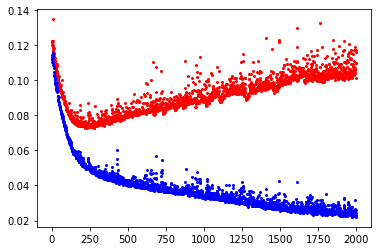

In [31]:
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, "o", c="red", markersize=2, label='Testset_loss')
plt.plot(x_len, y_loss, "o", c="blue", markersize=2, label='Trainset_loss')

No handles with labels found to put in legend.


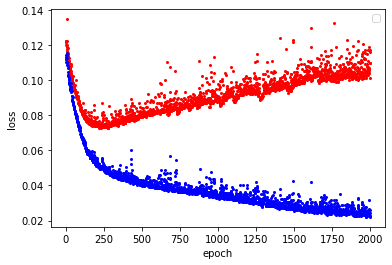

In [32]:
plt.legend(loc='upper right')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(x_len, y_vloss, "o", c="red", markersize=2, label='Testset_loss')
plt.plot(x_len, y_loss, "o", c="blue", markersize=2, label='Trainset_loss')
plt.show()

검증셋의 오차가 커지기 전에 학습을 중단시키고, 그때의 모델을 저장해야함.

In [34]:
from tensorflow.keras.callbacks import EarlyStopping

In [35]:
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=20)

In [36]:
modelpath = './data/model/Ch14-4-bestmodel.hdf5'

In [37]:
checkpointer=ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=0, save_best_only=True)

In [38]:
history = model.fit(X_train, y_train, epochs=2000, batch_size=500, validation_split=0.25, verbose=1, callbacks=[early_stopping_callback, checkpointer])

Epoch 1/2000
8/8 [==============================] - 0s 23ms/step - loss: 0.0295 - accuracy: 0.9900 - val_loss: 0.1209 - val_accuracy: 0.9785
Epoch 2/2000
8/8 [==============================] - 0s 22ms/step - loss: 0.0301 - accuracy: 0.9910 - val_loss: 0.1209 - val_accuracy: 0.9800
Epoch 3/2000
8/8 [==============================] - 0s 23ms/step - loss: 0.0286 - accuracy: 0.9926 - val_loss: 0.1106 - val_accuracy: 0.9846
Epoch 4/2000
8/8 [==============================] - 0s 21ms/step - loss: 0.0254 - accuracy: 0.9920 - val_loss: 0.1028 - val_accuracy: 0.9831
Epoch 5/2000
8/8 [==============================] - 0s 20ms/step - loss: 0.0247 - accuracy: 0.9926 - val_loss: 0.1018 - val_accuracy: 0.9838
Epoch 6/2000
8/8 [==============================] - 0s 11ms/step - loss: 0.0230 - accuracy: 0.9931 - val_loss: 0.1021 - val_accuracy: 0.9838
Epoch 7/2000
8/8 [==============================] - 0s 15ms/step - loss: 0.0235 - accuracy: 0.9933 - val_loss: 0.1026 - val_accuracy: 0.9846
Epoch 8/2000


In [40]:
score=model.evaluate(X_test, y_test)
print('Test accuracy:', score[1])

41/41 [==============================] - 0s 2ms/step - loss: 0.0800 - accuracy: 0.9785
Test accuracy: 0.9784615635871887
